<a href="https://colab.research.google.com/github/juanbarredo/PARLER/blob/main/Sentiment_Analysis_parler_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project**
CAP4936-10406
Juan Barredo

How to data mine the Parler Dump

https://www.youtube.com/watch?v=ZEszws8A45Y&list=PLDQrYJXgF03DpBLHmXZFct9dGRCv0h8Cl&index=1&t=324s

https://github.com/sbooeshaghi/parlertrick

https://ddosecrets.com/wiki/Parler

https://web.archive.org/web/2021*/parler.com



1.   **Load Data**



In [ ]:
!git clone https://github.com/sbooeshaghi/parlertrick.git

Cloning into 'parlertrick'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 3), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
!gunzip parlertrick/data/all_posts.csv.gz

In [ ]:
import pandas as pd
from textblob import TextBlob
import re

In [ ]:
df = pd.read_csv('parlertrick/data/all_posts.csv')

In [ ]:
df

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions
0,Andy Ngo,@AndyNgo,https://images.parler.com/777e039d6a5341388549...,Philadelphia Police charged 7 in relation to a...,https://api.parler.com/l/GJCyQ,5 days ago,132117.0
1,Bill Kays,@rebootbill,https://images.parler.com/706f1c9d8b454b5f8108...,NaN,NaN,4 days ago,13.0
2,Flint Bedrock,@flintbedrock,https://images.parler.com/1f45e69f8ed145f9b7b0...,Patriots in DC are ready for tomorrow.,NaN,5 days ago,248971.0
3,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,Let’s follow each other!,https://api.parler.com/l/jB7Lz,5 days ago,9829.0
4,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,NaN,../../api.parler.com/l/6Ac5M.html,5 days ago,15689.0
...,...,...,...,...,...,...,...
336475,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,She claims a #blm member hit her in the face a...,NaN,5 days ago,8694.0
336476,Vmilner,@Vmilner,../../images.parler.com/3f88420057b14dc3883b86...,NaN,NaN,5 days ago,44.0
336477,Diamond And Silk,@DiamondAndSilk,https://images.parler.com/66c3bf6a396b40509767...,BIG NEWS IN PENNSYLVANIA!,https://api.parler.com/l/USgUy,5 days ago,1468761.0
336478,Trump News🇺🇸,@TrumpNewsNow,../../images.parler.com/c3ba17bb35d447f79f151d...,We have had ENOUGH❗️We love our country ❤️We l...,../../api.parler.com/l/noQYu.html,5 days ago,23165.0


https://www.nltk.org/

*   Natural Language Toolkit
*   NLTK is a leading platform for building Python programs to work with human language data.





In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The cell below took like 15 minutes to run.

In [ ]:
posts = df['post_text'].tolist()
keep_tokens = []
for post in posts:
  if isinstance(post, str):
    tokens = nltk.word_tokenize(post)
    keep = []
    for token in tokens:
      word = token.lower()
      if word.isalnum() and word not in nltk.corpus.stopwords.words('english'):
        keep.append(word)
    keep_tokens.append(keep)
  else:
    keep_tokens.append([])

In [ ]:
df['post_tokens'] = keep_tokens

In [ ]:
for idx,post in enumerate(keep_tokens):
  if post:
    if "inside" in post and "muriel" not in post:
      print(df.iloc[idx]['post_text'])

As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Video inside Fulton County polling center - NO Republican observers, screens hidden from view
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Doc, Dopey, Grumpy, Sleepy, Happy, Bashful and Sneezy?CIA huge computers Seven Dwarfs - cloak-and-dagger- Operation code-named (Snow White) .=== Why was Op[e]ration Mockingbird repeated?Why was Jason Bourne (CIA/Dream) repeated?Think social media platforms.Who are the Wizards & Warloc[k]s? What council do the Wizards & Warlocks control?Think Snowden (inside terms dropped).Alice & Wonderland – understood.Snow White – understood.
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Our country must f

In [ ]:
df.iloc[idx]['post_text']

nan

In [ ]:
df

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions,post_tokens
0,Andy Ngo,@AndyNgo,https://images.parler.com/777e039d6a5341388549...,Philadelphia Police charged 7 in relation to a...,https://api.parler.com/l/GJCyQ,5 days ago,132117.0,"[philadelphia, police, charged, 7, relation, a..."
1,Bill Kays,@rebootbill,https://images.parler.com/706f1c9d8b454b5f8108...,NaN,NaN,4 days ago,13.0,[]
2,Flint Bedrock,@flintbedrock,https://images.parler.com/1f45e69f8ed145f9b7b0...,Patriots in DC are ready for tomorrow.,NaN,5 days ago,248971.0,"[patriots, dc, ready, tomorrow]"
3,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,Let’s follow each other!,https://api.parler.com/l/jB7Lz,5 days ago,9829.0,"[let, follow]"
4,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,NaN,../../api.parler.com/l/6Ac5M.html,5 days ago,15689.0,[]
...,...,...,...,...,...,...,...,...
336475,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,She claims a #blm member hit her in the face a...,NaN,5 days ago,8694.0,"[claims, blm, member, hit, face, police, prote..."
336476,Vmilner,@Vmilner,../../images.parler.com/3f88420057b14dc3883b86...,NaN,NaN,5 days ago,44.0,[]
336477,Diamond And Silk,@DiamondAndSilk,https://images.parler.com/66c3bf6a396b40509767...,BIG NEWS IN PENNSYLVANIA!,https://api.parler.com/l/USgUy,5 days ago,1468761.0,"[big, news, pennsylvania]"
336478,Trump News🇺🇸,@TrumpNewsNow,../../images.parler.com/c3ba17bb35d447f79f151d...,We have had ENOUGH❗️We love our country ❤️We l...,../../api.parler.com/l/noQYu.html,5 days ago,23165.0,"[love, country, love, president, let, election..."



2.   Explore and Clean data



So, below you can see the 'post_timestamp' contents.

In [ ]:
print(df['post_timestamp'].unique())

['5 days ago' '4 days ago' '1 week ago' '3 weeks ago' '5 months ago' nan
 '2 months ago' '1 month ago' '6 days ago' '2 weeks ago' '6 months ago'
 '4 months ago' '4 weeks ago' '3 months ago' '8 months ago' '1 year ago'
 '2 years ago' '7 months ago' '10 months ago' '11 months ago']


Below I am dropping the columns that I will not need for the sentiment analyses.  I will need to bring back 'post_tokens' later on for the word cloud though.

In [ ]:
df = df.drop(columns=['author_name', 'author_username', 'author_profile_photo', 'post_image', 'post_impressions', 'post_tokens'])

In [ ]:
df

,post_text,post_timestamp
0,Philadelphia Police charged 7 in relation to a...,5 days ago
1,NaN,4 days ago
2,Patriots in DC are ready for tomorrow.,5 days ago
3,Let’s follow each other!,5 days ago
4,NaN,5 days ago
...,...,...
336475,She claims a #blm member hit her in the face a...,5 days ago
336476,NaN,5 days ago
336477,BIG NEWS IN PENNSYLVANIA!,5 days ago
336478,We have had ENOUGH❗️We love our country ❤️We l...,5 days ago


In [ ]:
df = df.dropna()

In [ ]:
df

,post_text,post_timestamp
0,Philadelphia Police charged 7 in relation to a...,5 days ago
2,Patriots in DC are ready for tomorrow.,5 days ago
3,Let’s follow each other!,5 days ago
5,Round and round we go.,5 days ago
6,His name was Seth Rich..,5 days ago
...,...,...
336472,Kamala Harris recently told a touching story a...,5 days ago
336473,I admit that it feels like we are in bottom of...,5 days ago
336475,She claims a #blm member hit her in the face a...,5 days ago
336477,BIG NEWS IN PENNSYLVANIA!,5 days ago


I am choosing to start with the '2 years ago' time stamp.

In [ ]:
df_two_years_ago = df.loc[df['post_timestamp'] == '2 years ago']

In [ ]:
df_two_years_ago = df_two_years_ago.drop(columns=['post_timestamp'])

In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
df_two_years_ago

,post_text,Polarity,Subjectivity
0,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000000,0.000000
1,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000000,0.000000
2,ANTIFA LEADER UNMASKED: The Leader of Antifa has been exposed!His name: Joseph “Jose” AlcoffYou know what to do! ECHO and let the world see him. Make him recognizable to everyone! #AntifaUnmasked ...,0.312500,0.250000
3,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000000,0.000000
4,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000000,0.000000
...,...,...,...
105,"Wow and without question, this by far is the best and most honest article ever written about me. It’s a 5-min read and all my followers should read it. Very happy to have done this interview.“Imam...",0.550000,0.783333
106,ANTIFA LEADER UNMASKED: The Leader of Antifa has been exposed!His name: Joseph “Jose” AlcoffYou know what to do! ECHO and let the world see him. Make him recognizable to everyone! #AntifaUnmasked ...,0.312500,0.250000
107,"‪“If all Tweeters were determined not to tweet anything till they were sure it would offend nobody, there would be very little tweeted.” ‬‪“...but in this world nothing can be said to be certain, ...",0.200967,0.694246
108,"If your living in America, but you hate our country then you need to go back to wherever the hell you came from(you won’t be missed✔️)Echoes move this,(the middle number)Votes won’t move this mess...",-0.266667,0.300000


TextBlob for df_two_years_ago

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

**"TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc."**









In [ ]:
def get_sentiment(dataframe, column):
    text_column = dataframe[column]
    textblob_sentiment = text_column.apply(TextBlob)
    sentiment_values = [ {'Polarity': v.sentiment.polarity, 
                          'Subjectivity': v.sentiment.subjectivity}
                   for v in textblob_sentiment.values]
    return pd.DataFrame(sentiment_values)

In [ ]:
sentiment_frame = get_sentiment(df_two_years_ago, 'post_text')

In [ ]:
sentiment_frame.head(10)

,Polarity,Subjectivity
0,0.000000,0.0000
1,0.000000,0.0000
2,0.312500,0.2500
3,0.000000,0.0000
4,0.000000,0.0000
5,0.000000,0.0000
6,-0.134375,0.5625
7,-0.134375,0.5625
8,0.312500,0.2500
9,-0.500000,0.3000


In [ ]:
#df_two_years_ago = pd.concat([df_two_years_ago, sentiment_frame], axis=1)

In [ ]:
sentiment_frame.dtypes

Polarity        float64
Subjectivity    float64
dtype: object

In [ ]:
df_two_years_ago.reset_index(drop=True,inplace=True)
sentiment_frame['Polarity'] = sentiment_frame['Polarity'].astype(float)
df_two_years_ago['Polarity'] = sentiment_frame['Polarity']

In [ ]:
df_two_years_ago.reset_index(drop=True,inplace=True)
sentiment_frame['Subjectivity'] = sentiment_frame['Subjectivity'].astype(float)
df_two_years_ago['Subjectivity'] = sentiment_frame['Subjectivity']

In [ ]:
df_two_years_ago.head(10)

,post_text,Polarity,Subjectivity
0,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000000,0.0000
1,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000000,0.0000
2,ANTIFA LEADER UNMASKED: The Leader of Antifa has been exposed!His name: Joseph “Jose” AlcoffYou know what to do! ECHO and let the world see him. Make him recognizable to everyone! #AntifaUnmasked ...,0.312500,0.2500
3,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000000,0.0000
4,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000000,0.0000
5,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000000,0.0000
6,In an attempt to stop me from telling others on the face of planet Earth that :- Mohammed was a caveman.- Mohammed was an illiterate.- Mohammed was an ignorant.- Mohammed was a charlatan.- Mohamme...,-0.134375,0.5625
7,In an attempt to stop me from telling others on the face of planet Earth that :- Mohammed was a caveman.- Mohammed was an illiterate.- Mohammed was an ignorant.- Mohammed was a charlatan.- Mohamme...,-0.134375,0.5625
8,ANTIFA LEADER UNMASKED: The Leader of Antifa has been exposed!His name: Joseph “Jose” AlcoffYou know what to do! ECHO and let the world see him. Make him recognizable to everyone! #AntifaUnmasked ...,0.312500,0.2500
9,🙋🏻‍♂️ China is a bloodsucking leech and communism is a failed ideology that steals from others‼️😠#DemocratsMurderBabies,-0.500000,0.3000


In [ ]:
df_two_years_ago.Subjectivity.min()

0.0

In [ ]:
positive_two_years_ago = df_two_years_ago[df_two_years_ago.Polarity > 0.5]

In [ ]:
negative_two_years_ago = df_two_years_ago[df_two_years_ago.Polarity < - 0.5]

In [ ]:
positive_two_years_ago.head(15)

,post_text,Polarity,Subjectivity
104,LOL,0.80,0.700000
105,"Wow and without question, this by far is the best and most honest article ever written about me. It’s a 5-min read and all my followers should read it. Very happy to have done this interview.“Imam...",0.55,0.783333


In [ ]:
negative_two_years_ago.head(15)

,post_text,Polarity,Subjectivity


In [ ]:
neutral_two_years_ago = df_two_years_ago[ (df_two_years_ago.Polarity > -0.1) & (df_two_years_ago.Polarity < 0.1) ]

In [ ]:
neutral_two_years_ago.head(15)

,post_text,Polarity,Subjectivity
0,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000,0.000000
1,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000,0.000000
3,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000,0.000000
4,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000,0.000000
5,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000,0.000000
10,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000,0.000000
13,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000,0.000000
14,#TWEXIT You’ve Been Trumped 2020,0.000,0.000000
16,Clinton Library Refuses to Hand Over Information on Bill Clinton’s Ties to Jeffrey EpsteinTo move this message you have to echo it(that’s the middle number)You’re not helping with your votes😢 make...,0.000,0.000000
17,"If you believe Jesus is Messiah, ECHO!! ✝️",0.000,0.000000


TextBlob for df_one_year_ago

In [ ]:
df

,post_text,post_timestamp
0,Philadelphia Police charged 7 in relation to an #antifa riot on New Years Eve where black bloc militants smashed up federal buildings. They were also carrying a firebomb.Adam McVickerMeredith Took...,5 days ago
2,Patriots in DC are ready for tomorrow.,5 days ago
3,Let’s follow each other!,5 days ago
5,Round and round we go.,5 days ago
6,His name was Seth Rich..,5 days ago
...,...,...
336472,"Kamala Harris recently told a touching story about her childhood history of civil rights activism. Turns out, she plagiarized the whole incident from a 1965 Martin Luther King interview.",5 days ago
336473,"I admit that it feels like we are in bottom of 9th inning with 2 outs down by 3 runs (courts, legislatures, & government officials).But I have never wavered in my faith that God will send @Name Hi...",5 days ago
336475,She claims a #blm member hit her in the face and the police PROTECTED her aggressor. THAT is why police were pepper spraying the Patriots because the Patriots were furious over this.,5 days ago
336477,BIG NEWS IN PENNSYLVANIA!,5 days ago


In [ ]:
df_one_year_ago = df.loc[df['post_timestamp'] == '1 year ago']

In [ ]:
df_one_year_ago = df_one_year_ago.drop(columns=['post_timestamp'])

In [ ]:
df_one_year_ago = df_one_year_ago.dropna()

In [ ]:
sentiment_frame_one_year_ago = get_sentiment(df_one_year_ago, 'post_text')

In [ ]:
#df_one_year_ago = pd.concat([df_one_year_ago, sentiment_frame_one_year_ago], axis=1)

In [ ]:
df_one_year_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_year_ago['Polarity'] = sentiment_frame_one_year_ago['Polarity'].astype(float)
df_one_year_ago['Polarity'] = sentiment_frame_one_year_ago['Polarity']

In [ ]:
df_one_year_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_year_ago['Subjectivity'] = sentiment_frame_one_year_ago['Subjectivity'].astype(float)
df_one_year_ago['Subjectivity'] = sentiment_frame_one_year_ago['Subjectivity']

In [ ]:
df_one_year_ago.Subjectivity.min()

0.0

In [ ]:
positive_one_year_ago = df_one_year_ago[df_one_year_ago.Polarity > 0.5]

In [ ]:
negative_one_year_ago = df_one_year_ago[df_one_year_ago.Polarity < - 0.5]

In [ ]:
neutral_one_year_ago = df_one_year_ago[ (df_one_year_ago.Polarity > -0.1) & (df_one_year_ago.Polarity < 0.1) ]

In [ ]:
df_four_days_ago = df.loc[df['post_timestamp'] == '4 days ago']

In [ ]:
df_four_days_ago = df_four_days_ago.drop(columns=['post_timestamp'])

In [ ]:
df_four_days_ago = df_four_days_ago.dropna()

In [ ]:
sentiment_frame_four_days_ago = get_sentiment(df_four_days_ago, 'post_text')

In [ ]:
#df_four_days_ago = pd.concat([df_four_days_ago, sentiment_frame_four_days_ago], axis=1)

In [ ]:
df_four_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_four_days_ago['Polarity'] = sentiment_frame_four_days_ago['Polarity'].astype(float)
df_four_days_ago['Polarity'] = sentiment_frame_four_days_ago['Polarity']

In [ ]:
df_four_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_four_days_ago['Subectivity'] = sentiment_frame_four_days_ago['Subjectivity'].astype(float)
df_four_days_ago['Subjectivity'] = sentiment_frame_four_days_ago['Subjectivity']

In [ ]:
df_four_days_ago.Subjectivity.min()

0.0

In [ ]:
positive_four_days_ago = df_four_days_ago[df_four_days_ago.Polarity > 0.5]

In [ ]:
negative_four_days_ago = df_four_days_ago[df_four_days_ago.Polarity < - 0.5]

In [ ]:
neutral_four_days_ago = df_four_days_ago[(df_four_days_ago.Polarity > -0.1) & (df_four_days_ago.Polarity < 0.1)]

In [ ]:
print(df_four_days_ago.shape)

(53795, 3)


In [ ]:
print(positive_four_days_ago.shape)

(1923, 3)


In [ ]:
print(negative_four_days_ago.shape)

(1006, 3)


In [ ]:
print(neutral_four_days_ago.shape)

(30803, 3)


In [ ]:
print(positive_two_years_ago.shape)

(2, 3)


In [ ]:
print(negative_two_years_ago.shape)

(0, 3)


In [ ]:
print(neutral_two_years_ago.shape)

(59, 3)


In [ ]:
df_eleven_months_ago = df.loc[df['post_timestamp'] == '11 months ago']

In [ ]:
df_eleven_months_ago = df_eleven_months_ago.drop(columns=['post_timestamp'])

In [ ]:
df_eleven_months_ago = df_eleven_months_ago.dropna()

In [ ]:
sentiment_frame_eleven_months_ago = get_sentiment(df_eleven_months_ago, 'post_text')

In [ ]:
df_eleven_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_eleven_months_ago['Polarity'] = sentiment_frame_eleven_months_ago['Polarity'].astype(float)
df_eleven_months_ago['Polarity'] = sentiment_frame_eleven_months_ago['Polarity']

In [ ]:
df_eleven_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_eleven_months_ago['Subjectivity'] = sentiment_frame_eleven_months_ago['Subjectivity'].astype(float)
df_eleven_months_ago['Subjectivity'] = sentiment_frame_eleven_months_ago['Subjectivity']

In [ ]:
df_eleven_months_ago.Subjectivity.min()

0.2125

In [ ]:
positive_eleven_months_ago = df_eleven_months_ago[df_eleven_months_ago.Polarity > 0.5]

In [ ]:
negative_eleven_months_ago = df_eleven_months_ago[df_eleven_months_ago.Polarity < - 0.5]

In [ ]:
neutral_eleven_months_ago = df_eleven_months_ago[(df_eleven_months_ago.Polarity > -0.1) & (df_eleven_months_ago.Polarity < 0.1)]

In [ ]:
df_ten_months_ago = df.loc[df['post_timestamp'] == '10 months ago']

In [ ]:
df_ten_months_ago = df_ten_months_ago.drop(columns=['post_timestamp'])

In [ ]:
df_ten_months_ago = df_ten_months_ago.dropna()

In [ ]:
sentiment_frame_ten_months_ago = get_sentiment(df_ten_months_ago, 'post_text')

In [ ]:
df_ten_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_ten_months_ago['Polarity'] = sentiment_frame_ten_months_ago['Polarity'].astype(float)
df_ten_months_ago['Polarity'] = sentiment_frame_ten_months_ago['Polarity']

In [ ]:
df_ten_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_ten_months_ago['Subjectivity'] = sentiment_frame_ten_months_ago['Subjectivity'].astype(float)
df_ten_months_ago['Subjectivity'] = sentiment_frame_ten_months_ago['Subjectivity']

In [ ]:
df_ten_months_ago.Subjectivity.min()

0.2

In [ ]:
positive_ten_months_ago = df_ten_months_ago[df_ten_months_ago.Polarity > 0.5]
negative_ten_months_ago = df_ten_months_ago[df_ten_months_ago.Polarity < - 0.5]

In [ ]:
neutral_ten_months_ago = df_ten_months_ago[(df_ten_months_ago.Polarity > -0.1) & (df_ten_months_ago.Polarity < 0.1)]

In [ ]:
df_eight_months_ago = df.loc[df['post_timestamp'] == '8 months ago']
df_eight_months_ago = df_eight_months_ago.drop(columns=['post_timestamp'])
df_eight_months_ago = df_eight_months_ago.dropna()
df_ten_months_ago.head(10)

,post_text,Polarity,Subjectivity
0,Do we really want to allow this in our country? They come illegaly to change what we hold dear. Our FREEDOMS !,0.250000,0.200000
1,If you are in europe make sure to have food for 2-3 weeks. Italy qurantines 1/4 of their population. Just announced today. #coronavirus Echo this and join Pockenet another alternative social media...,0.266667,0.477778
2,Every person in America should be able to lock up their doors and windows and survive 30 days with no outside help or supplies. You should also be prepared and able to defend it. #JohnnyBravo,0.333333,0.433333


In [ ]:
sentiment_frame_eight_months_ago = get_sentiment(df_eight_months_ago, 'post_text')

In [ ]:
df_eight_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_eight_months_ago['Polarity'] = sentiment_frame_eight_months_ago['Polarity'].astype(float)
df_eight_months_ago['Polarity'] = sentiment_frame_eight_months_ago['Polarity']

In [ ]:
df_eight_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_eight_months_ago['Subjectivity'] = sentiment_frame_eight_months_ago['Subjectivity'].astype(float)
df_eight_months_ago['Subjectivity'] = sentiment_frame_eight_months_ago['Subjectivity']

In [ ]:
df_eight_months_ago.Subjectivity.min()

0.3571428571428571

In [ ]:
positive_eight_months_ago = df_eight_months_ago[df_eight_months_ago.Polarity > 0.5]
negative_eight_months_ago = df_eight_months_ago[df_eight_months_ago.Polarity < - 0.5]
neutral_eight_months_ago = df_eight_months_ago[(df_eight_months_ago.Polarity > -0.1) & (df_eight_months_ago.Polarity < 0.1)]

In [ ]:
df_seven_months_ago = df.loc[df['post_timestamp'] == '7 months ago']
df_seven_months_ago = df_seven_months_ago.drop(columns=['post_timestamp'])
df_seven_months_ago = df_seven_months_ago.dropna()
df_seven_months_ago.head(10)

,post_text
13337,"LET FREEDOM RING ! When I sculpted this bell I never expected people would vandalize it but they have like ""F"" America spray painted on it and many other things but I go back and repair it every t..."
17087,🌟SHARE!🌟Stealing a sign out of someone's yard is a felony. It's obvious these women are oblivious to the fact. Let's make them famous PARLER .#Liberals. #Dumbasses #StealingIsAgainstTheLaw
21125,PRO-TIP: Upvoting does not ‘spread’ or share a post. Only Echoing adds it to another timeline for additional followers to see. If you want to share a post - Echo.
26089,#obamagate
36351,Can this post get 2000 Echos so we can show the world how much we LOVE President Trump on his birthday? #HappyBirthdayPOTUS
46239,👺EVIL UN #Globalistsunder the influence of#Islamic 🕋 #Satanicmoral fragmentation and destruction of the 👉🏻Family Unit 🤔🕋TO FORCE🕋👈🏻🌎 New 🌍 World🌏 Order MASS DEATH💥
47842,ECHO if you’re an Active Parler User!
62940,👺EVIL UN #Globalistsunder the influence of#Islamic 🕋 #Satanicmoral fragmentation and destruction of the 👉🏻Family Unit 🤔🕋TO FORCE🕋👈🏻🌎 New 🌍 World🌏 Order MASS DEATH💥
75174,👺EVIL UN #Globalistsunder the influence of#Islamic 🕋 #Satanicmoral fragmentation and destruction of the 👉🏻Family Unit 🤔🕋TO FORCE🕋👈🏻🌎 New 🌍 World🌏 Order MASS DEATH💥
107664,🌟SHARE!🌟Stealing a sign out of someone's yard is a felony. It's obvious these women are oblivious to the fact. Let's make them famous PARLER .#Liberals. #Dumbasses #StealingIsAgainstTheLaw


In [ ]:
sentiment_frame_seven_months_ago = get_sentiment(df_seven_months_ago, 'post_text')

In [ ]:
df_seven_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_seven_months_ago['Polarity'] = sentiment_frame_seven_months_ago['Polarity'].astype(float)
df_seven_months_ago['Polarity'] = sentiment_frame_seven_months_ago['Polarity']

In [ ]:
df_seven_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_seven_months_ago['Subjectivity'] = sentiment_frame_seven_months_ago['Subjectivity'].astype(float)
df_seven_months_ago['Subjectivity'] = sentiment_frame_seven_months_ago['Subjectivity']

In [ ]:
df_seven_months_ago.Subjectivity.min()

0.0

In [ ]:
positive_seven_months_ago = df_seven_months_ago[df_seven_months_ago.Polarity > 0.5]
negative_seven_months_ago = df_seven_months_ago[df_seven_months_ago.Polarity < - 0.5]
neutral_seven_months_ago = df_seven_months_ago[(df_seven_months_ago.Polarity > -0.1) & (df_seven_months_ago.Polarity < 0.1)]

In [ ]:
df_six_months_ago = df.loc[df['post_timestamp'] == '6 months ago']
df_six_months_ago = df_six_months_ago.drop(columns=['post_timestamp'])
df_six_months_ago = df_six_months_ago.dropna()
df_six_months_ago.head(10)

,post_text
563,Outraged that an imposter has registered the @HawleyMO account on Parler. This will be rectified!
2346,Right on Q. #Coronavirus is right back into the headlines after disappearing during all these False Flag protests. Lockdown 2.0 is on the horizon as Democrats keep fighting to sink America anyway ...
2999,Right on Q. #Coronavirus is right back into the headlines after disappearing during all these False Flag protests. Lockdown 2.0 is on the horizon as Democrats keep fighting to sink America anyway ...
5294,Just do it...
5304,Blue.Dragon mkt político a 26 anos fazendo a história
6018,"This Man, Who was Stomped by Domestic Terrorists, has Now Died. The Terrorist Who Murdered Him Is Still At Large...This is Him, Please ECHO"
9188,‪Three years after.. do you still support President Trump?‬‪Echo if you do! ‬
15354,Thanks to all of the new follows! Let’s keep growing this community together! Thank you!
21341,"I'm going to do something I very rarely do- I'm going to ask people to ECHO this post, or, for someone with Name Recognition to do so, so that we can get as many as possible, TO SEND A MESSAGE TO ..."
21501,STOP POSTING LINKS TO TWITTER!!! JUST POST SCREENSHOTS OF WHAT YOU WANT TO SHARE. LINKS GIVE THEM $$$. ECHO TO GET THIS MESSAGE OUT!🇺🇸🇺🇸🇺🇸


In [ ]:
sentiment_frame_six_months_ago = get_sentiment(df_six_months_ago, 'post_text')

In [ ]:
df_six_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_six_months_ago['Polarity'] = sentiment_frame_six_months_ago['Polarity'].astype(float)
df_six_months_ago['Polarity'] = sentiment_frame_six_months_ago['Polarity']

In [ ]:
df_six_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_six_months_ago['Subjectivity'] = sentiment_frame_six_months_ago['Subjectivity'].astype(float)
df_six_months_ago['Subjectivity'] = sentiment_frame_six_months_ago['Subjectivity']

In [ ]:
df_six_months_ago.Subjectivity.min()

0.0

In [ ]:
positive_six_months_ago = df_six_months_ago[df_six_months_ago.Polarity > 0.5]
negative_six_months_ago = df_six_months_ago[df_six_months_ago.Polarity < - 0.5]
neutral_six_months_ago = df_six_months_ago[(df_six_months_ago.Polarity > -0.1) & (df_six_months_ago.Polarity < 0.1)]

In [ ]:
df_five_months_ago = df.loc[df['post_timestamp'] == '5 months ago']
df_five_months_ago = df_five_months_ago.drop(columns=['post_timestamp'])
df_five_months_ago = df_five_months_ago.dropna()
sentiment_frame_five_months_ago = get_sentiment(df_five_months_ago, 'post_text')

In [ ]:
df_five_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_five_months_ago['Polarity'] = sentiment_frame_five_months_ago['Polarity'].astype(float)
df_five_months_ago['Polarity'] = sentiment_frame_five_months_ago['Polarity']
df_five_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_five_months_ago['Subjectivity'] = sentiment_frame_five_months_ago['Subjectivity'].astype(float)
df_five_months_ago['Subjectivity'] = sentiment_frame_five_months_ago['Subjectivity']

In [ ]:
df_five_months_ago.Subjectivity.min()
positive_five_months_ago = df_five_months_ago[df_five_months_ago.Polarity > 0.5]
negative_five_months_ago = df_five_months_ago[df_five_months_ago.Polarity < - 0.5]
neutral_five_months_ago = df_five_months_ago[(df_five_months_ago.Polarity > -0.1) & (df_five_months_ago.Polarity < 0.1)]

In [ ]:
df_four_months_ago = df.loc[df['post_timestamp'] == '4 months ago']
df_four_months_ago = df_four_months_ago.drop(columns=['post_timestamp'])
df_four_months_ago = df_four_months_ago.dropna()
sentiment_frame_four_months_ago = get_sentiment(df_four_months_ago, 'post_text')

In [ ]:
df_four_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_four_months_ago['Polarity'] = sentiment_frame_four_months_ago['Polarity'].astype(float)
df_four_months_ago['Polarity'] = sentiment_frame_four_months_ago['Polarity']
df_four_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_four_months_ago['Subjectivity'] = sentiment_frame_four_months_ago['Subjectivity'].astype(float)
df_four_months_ago['Subjectivity'] = sentiment_frame_four_months_ago['Subjectivity']

In [ ]:
df_four_months_ago.Subjectivity.min()
positive_four_months_ago = df_four_months_ago[df_four_months_ago.Polarity > 0.5]
negative_four_months_ago = df_four_months_ago[df_four_months_ago.Polarity < - 0.5]
neutral_four_months_ago = df_four_months_ago[(df_four_months_ago.Polarity > -0.1) & (df_four_months_ago.Polarity < 0.1)]

In [ ]:
df_three_months_ago = df.loc[df['post_timestamp'] == '3 months ago']
df_three_months_ago = df_three_months_ago.drop(columns=['post_timestamp'])
df_three_months_ago = df_three_months_ago.dropna()
sentiment_frame_three_months_ago = get_sentiment(df_three_months_ago, 'post_text')

In [ ]:
df_three_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_three_months_ago['Polarity'] = sentiment_frame_three_months_ago['Polarity'].astype(float)
df_three_months_ago['Polarity'] = sentiment_frame_three_months_ago['Polarity']
df_three_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_three_months_ago['Subjectivity'] = sentiment_frame_three_months_ago['Subjectivity'].astype(float)
df_three_months_ago['Subjectivity'] = sentiment_frame_three_months_ago['Subjectivity']

In [ ]:
df_three_months_ago.Subjectivity.min()
positive_three_months_ago = df_three_months_ago[df_three_months_ago.Polarity > 0.5]
negative_three_months_ago = df_three_months_ago[df_three_months_ago.Polarity < - 0.5]
neutral_three_months_ago = df_three_months_ago[(df_three_months_ago.Polarity > -0.1) & (df_three_months_ago.Polarity < 0.1)]

In [ ]:
df_two_months_ago = df.loc[df['post_timestamp'] == '2 months ago']
df_two_months_ago = df_two_months_ago.drop(columns=['post_timestamp'])
df_two_months_ago = df_two_months_ago.dropna()
sentiment_frame_two_months_ago = get_sentiment(df_two_months_ago, 'post_text')

In [ ]:
df_two_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_two_months_ago['Polarity'] = sentiment_frame_two_months_ago['Polarity'].astype(float)
df_two_months_ago['Polarity'] = sentiment_frame_two_months_ago['Polarity']
df_two_months_ago.reset_index(drop=True,inplace=True)
sentiment_frame_two_months_ago['Subjectivity'] = sentiment_frame_two_months_ago['Subjectivity'].astype(float)
df_two_months_ago['Subjectivity'] = sentiment_frame_two_months_ago['Subjectivity']

In [ ]:
df_two_months_ago.Subjectivity.min()
positive_two_months_ago = df_two_months_ago[df_two_months_ago.Polarity > 0.5]
negative_two_months_ago = df_two_months_ago[df_two_months_ago.Polarity < - 0.5]
neutral_two_months_ago = df_two_months_ago[(df_two_months_ago.Polarity > -0.1) & (df_two_months_ago.Polarity < 0.1)]

In [ ]:
df_one_month_ago = df.loc[df['post_timestamp'] == '1 month ago']
df_one_month_ago = df_one_month_ago.drop(columns=['post_timestamp'])
df_one_month_ago = df_one_month_ago.dropna()
sentiment_frame_one_month_ago = get_sentiment(df_one_month_ago, 'post_text')

In [ ]:
df_one_month_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_month_ago['Polarity'] = sentiment_frame_one_month_ago['Polarity'].astype(float)
df_one_month_ago['Polarity'] = sentiment_frame_one_month_ago['Polarity']
df_one_month_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_month_ago['Subjectivity'] = sentiment_frame_one_month_ago['Subjectivity'].astype(float)
df_one_month_ago['Subjectivity'] = sentiment_frame_one_month_ago['Subjectivity']

In [ ]:
df_one_month_ago.Subjectivity.min()
positive_one_month_ago = df_one_month_ago[df_one_month_ago.Polarity > 0.5]
negative_one_month_ago = df_one_month_ago[df_one_month_ago.Polarity < - 0.5]
neutral_one_month_ago = df_one_month_ago[(df_one_month_ago.Polarity > -0.1) & (df_one_month_ago.Polarity < 0.1)]

In [ ]:
df_three_weeks_ago = df.loc[df['post_timestamp'] == '3 weeks ago']
df_three_weeks_ago = df_three_weeks_ago.drop(columns=['post_timestamp'])
df_three_weeks_ago = df_three_weeks_ago.dropna()
sentiment_frame_three_weeks_ago = get_sentiment(df_three_weeks_ago, 'post_text')

In [ ]:
df_three_weeks_ago.reset_index(drop=True,inplace=True)
sentiment_frame_three_weeks_ago['Polarity'] = sentiment_frame_three_weeks_ago['Polarity'].astype(float)
df_three_weeks_ago['Polarity'] = sentiment_frame_three_weeks_ago['Polarity']
df_three_weeks_ago.reset_index(drop=True,inplace=True)
sentiment_frame_three_weeks_ago['Subjectivity'] = sentiment_frame_three_weeks_ago['Subjectivity'].astype(float)
df_three_weeks_ago['Subjectivity'] = sentiment_frame_three_weeks_ago['Subjectivity']

In [ ]:
df_three_weeks_ago.Subjectivity.min()
positive_three_weeks_ago = df_three_weeks_ago[df_three_weeks_ago.Polarity > 0.5]
negative_three_weeks_ago = df_three_weeks_ago[df_three_weeks_ago.Polarity < - 0.5]
neutral_three_weeks_ago = df_three_weeks_ago[(df_three_weeks_ago.Polarity > -0.1) & (df_three_weeks_ago.Polarity < 0.1)]

In [ ]:
df_two_weeks_ago = df.loc[df['post_timestamp'] == '2 weeks ago']
df_two_weeks_ago = df_two_weeks_ago.drop(columns=['post_timestamp'])
df_two_weeks_ago = df_two_weeks_ago.dropna()
sentiment_frame_two_weeks_ago = get_sentiment(df_two_weeks_ago, 'post_text')

In [ ]:
df_two_weeks_ago.reset_index(drop=True,inplace=True)
sentiment_frame_two_weeks_ago['Polarity'] = sentiment_frame_two_weeks_ago['Polarity'].astype(float)
df_two_weeks_ago['Polarity'] = sentiment_frame_two_weeks_ago['Polarity']
df_two_weeks_ago.reset_index(drop=True,inplace=True)
sentiment_frame_two_weeks_ago['Subjectivity'] = sentiment_frame_two_weeks_ago['Subjectivity'].astype(float)
df_two_weeks_ago['Subjectivity'] = sentiment_frame_two_weeks_ago['Subjectivity']

In [ ]:
df_two_weeks_ago.Subjectivity.min()
positive_two_weeks_ago = df_two_weeks_ago[df_two_weeks_ago.Polarity > 0.5]
negative_two_weeks_ago = df_two_weeks_ago[df_two_weeks_ago.Polarity < - 0.5]
neutral_two_weeks_ago = df_two_weeks_ago[(df_two_weeks_ago.Polarity > -0.1) & (df_two_weeks_ago.Polarity < 0.1)]

In [ ]:
df_one_week_ago = df.loc[df['post_timestamp'] == '1 week ago']
df_one_week_ago = df_one_week_ago.drop(columns=['post_timestamp'])
df_one_week_ago = df_one_week_ago.dropna()
sentiment_frame_one_week_ago = get_sentiment(df_one_week_ago, 'post_text')

In [ ]:
df_one_week_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_week_ago['Polarity'] = sentiment_frame_one_week_ago['Polarity'].astype(float)
df_one_week_ago['Polarity'] = sentiment_frame_one_week_ago['Polarity']
df_one_week_ago.reset_index(drop=True,inplace=True)
sentiment_frame_one_week_ago['Subjectivity'] = sentiment_frame_one_week_ago['Subjectivity'].astype(float)
df_one_week_ago['Subjectivity'] = sentiment_frame_one_week_ago['Subjectivity']

In [ ]:
df_one_week_ago.Subjectivity.min()
positive_one_week_ago = df_one_week_ago[df_one_week_ago.Polarity > 0.5]
negative_one_week_ago = df_one_week_ago[df_one_week_ago.Polarity < - 0.5]
neutral_one_week_ago = df_one_week_ago[(df_one_week_ago.Polarity > -0.1) & (df_one_week_ago.Polarity < 0.1)]

In [ ]:
df_six_days_ago = df.loc[df['post_timestamp'] == '6 days ago']
df_six_days_ago = df_six_days_ago.drop(columns=['post_timestamp'])
df_six_days_ago = df_six_days_ago.dropna()
sentiment_frame_six_days_ago = get_sentiment(df_six_days_ago, 'post_text')

In [ ]:
df_six_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_six_days_ago['Polarity'] = sentiment_frame_six_days_ago['Polarity'].astype(float)
df_six_days_ago['Polarity'] = sentiment_frame_six_days_ago['Polarity']
df_six_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_six_days_ago['Subjectivity'] = sentiment_frame_six_days_ago['Subjectivity'].astype(float)
df_six_days_ago['Subjectivity'] = sentiment_frame_six_days_ago['Subjectivity']

In [ ]:
df_six_days_ago.Subjectivity.min()
positive_six_days_ago = df_six_days_ago[df_six_days_ago.Polarity > 0.5]
negative_six_days_ago = df_six_days_ago[df_six_days_ago.Polarity < - 0.5]
neutral_six_days_ago = df_six_days_ago[(df_six_days_ago.Polarity > -0.1) & (df_six_days_ago.Polarity < 0.1)]

In [ ]:
df_five_days_ago = df.loc[df['post_timestamp'] == '5 days ago']
df_five_days_ago = df_five_days_ago.drop(columns=['post_timestamp'])
df_five_days_ago = df_five_days_ago.dropna()
sentiment_frame_five_days_ago = get_sentiment(df_five_days_ago, 'post_text')

In [ ]:
df_five_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_five_days_ago['Polarity'] = sentiment_frame_five_days_ago['Polarity'].astype(float)
df_five_days_ago['Polarity'] = sentiment_frame_five_days_ago['Polarity']
df_five_days_ago.reset_index(drop=True,inplace=True)
sentiment_frame_five_days_ago['Subjectivity'] = sentiment_frame_five_days_ago['Subjectivity'].astype(float)
df_five_days_ago['Subjectivity'] = sentiment_frame_five_days_ago['Subjectivity']

In [ ]:
df_five_days_ago.Subjectivity.min()
positive_five_days_ago = df_five_days_ago[df_five_days_ago.Polarity > 0.5]
negative_five_days_ago = df_five_days_ago[df_five_days_ago.Polarity < - 0.5]
neutral_five_days_ago = df_five_days_ago[(df_five_days_ago.Polarity > -0.1) & (df_five_days_ago.Polarity < 0.1)]

Graphing

In [ ]:
print("neutral_two_years_ago:",neutral_two_years_ago.shape)
print("neutral_one_year_ago:",neutral_one_year_ago.shape)
print("neutral_eleven_months_ago:",neutral_eleven_months_ago.shape)
print("neutral_ten_months_ago:",neutral_ten_months_ago.shape)
print("neutral_eight_months_ago:",neutral_eight_months_ago.shape)
print("neutral_seven_months_ago:",neutral_seven_months_ago.shape)
print("neutral_six_months_ago:",neutral_six_months_ago.shape)
print("neutral_five_months_ago:",neutral_five_months_ago.shape)
print("neutral_four_months_ago:",neutral_four_months_ago.shape)
print("neutral_three_months_ago:",neutral_three_months_ago.shape)
print("neutral_two_months_ago:",neutral_two_months_ago.shape)
print("neutral_one_month_ago:",neutral_one_month_ago.shape)
print("neutral_three_weeks_ago:",neutral_three_weeks_ago.shape)
print("neutral_two_weeks_ago:",neutral_two_weeks_ago.shape)
print("neutral_one_week_ago:",neutral_one_week_ago.shape)
print("neutral_six_days_ago:",neutral_six_days_ago.shape)
print("neutral_five_days_ago:",neutral_five_days_ago.shape)
print("neutral_four_days_ago:",neutral_four_days_ago.shape)

neutral_two_years_ago: (59, 3)
neutral_one_year_ago: (10, 3)
neutral_eleven_months_ago: (3, 3)
neutral_ten_months_ago: (0, 3)
neutral_eight_months_ago: (0, 3)
neutral_seven_months_ago: (5, 3)
neutral_six_months_ago: (90, 3)
neutral_five_months_ago: (148, 3)
neutral_four_months_ago: (83, 3)
neutral_three_months_ago: (152, 3)
neutral_two_months_ago: (781, 3)
neutral_one_month_ago: (2349, 3)
neutral_three_weeks_ago: (1422, 3)
neutral_two_weeks_ago: (1312, 3)
neutral_one_week_ago: (4720, 3)
neutral_six_days_ago: (3533, 3)
neutral_five_days_ago: (101716, 3)
neutral_four_days_ago: (30803, 3)


In [ ]:
print("positive_two_years_ago:",positive_two_years_ago.shape)
print("positive_one_year_ago:",positive_one_year_ago.shape)
print("positive_eleven_months_ago:",positive_eleven_months_ago.shape)
print("positive_ten_months_ago:",positive_ten_months_ago.shape)
print("positive_eight_months_ago:",positive_eight_months_ago.shape)
print("positive_seven_months_ago:",positive_seven_months_ago.shape)
print("positive_six_months_ago:",positive_six_months_ago.shape)
print("positive_five_months_ago:",positive_five_months_ago.shape)
print("positive_four_months_ago:",positive_four_months_ago.shape)
print("positive_three_months_ago:",positive_three_months_ago.shape)
print("positive_two_months_ago:",positive_two_months_ago.shape)
print("positive_one_month_ago:",positive_one_month_ago.shape)
print("positive_three_weeks_ago:",positive_three_weeks_ago.shape)
print("positive_two_weeks_ago:",positive_two_weeks_ago.shape)
print("positive_one_week_ago:",positive_one_week_ago.shape)
print("positive_six_days_ago:",positive_six_days_ago.shape)
print("positive_five_days_ago:",positive_five_days_ago.shape)
print("positive_four_days_ago:",positive_four_days_ago.shape)

positive_two_years_ago: (2, 3)
positive_one_year_ago: (5, 3)
positive_eleven_months_ago: (1, 3)
positive_ten_months_ago: (0, 3)
positive_eight_months_ago: (0, 3)
positive_seven_months_ago: (0, 3)
positive_six_months_ago: (4, 3)
positive_five_months_ago: (5, 3)
positive_four_months_ago: (4, 3)
positive_three_months_ago: (9, 3)
positive_two_months_ago: (24, 3)
positive_one_month_ago: (380, 3)
positive_three_weeks_ago: (65, 3)
positive_two_weeks_ago: (231, 3)
positive_one_week_ago: (383, 3)
positive_six_days_ago: (270, 3)
positive_five_days_ago: (8428, 3)
positive_four_days_ago: (1923, 3)


In [ ]:
print("negative_two_years_ago:",negative_two_years_ago.shape)
print("negative_one_year_ago:",negative_one_year_ago.shape)
print("negative_eleven_months_ago:",negative_eleven_months_ago.shape)
print("negative_ten_months_ago:",negative_ten_months_ago.shape)
print("negative_eight_months_ago:",negative_eight_months_ago.shape)
print("negative_seven_months_ago:",negative_seven_months_ago.shape)
print("negative_six_months_ago:",negative_six_months_ago.shape)
print("negative_five_months_ago:",negative_five_months_ago.shape)
print("negative_four_months_ago:",negative_four_months_ago.shape)
print("negative_three_months_ago:",negative_three_months_ago.shape)
print("negative_two_months_ago:",negative_two_months_ago.shape)
print("negative_one_month_ago:",negative_one_month_ago.shape)
print("negative_three_weeks_ago:",negative_three_weeks_ago.shape)
print("negative_two_weeks_ago:",negative_two_weeks_ago.shape)
print("negative_one_week_ago:",negative_one_week_ago.shape)
print("negative_six_days_ago:",negative_six_days_ago.shape)
print("negative_five_days_ago",negative_five_days_ago.shape)
print("negative_four_days_ago:",negative_four_days_ago.shape)

negative_two_years_ago: (0, 3)
negative_one_year_ago: (17, 3)
negative_eleven_months_ago: (0, 3)
negative_ten_months_ago: (0, 3)
negative_eight_months_ago: (0, 3)
negative_seven_months_ago: (0, 3)
negative_six_months_ago: (2, 3)
negative_five_months_ago: (1, 3)
negative_four_months_ago: (0, 3)
negative_three_months_ago: (8, 3)
negative_two_months_ago: (31, 3)
negative_one_month_ago: (69, 3)
negative_three_weeks_ago: (9, 3)
negative_two_weeks_ago: (338, 3)
negative_one_week_ago: (169, 3)
negative_six_days_ago: (115, 3)
negative_five_days_ago (4464, 3)
negative_four_days_ago: (1006, 3)


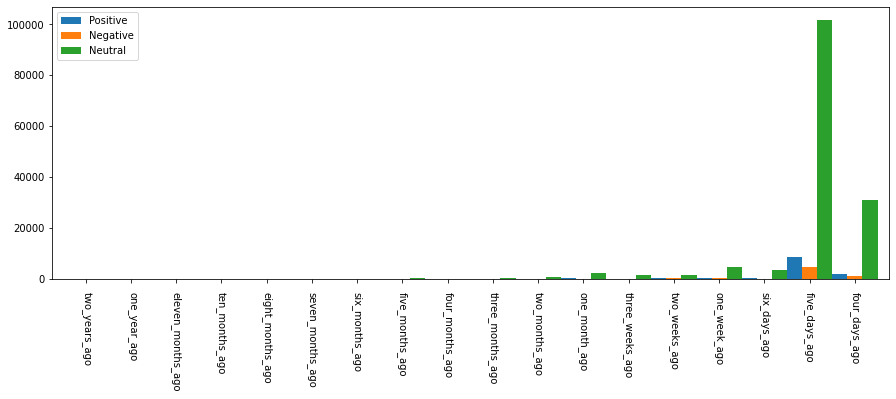

In [ ]:
Positive = [2, 5, 1, 0, 0, 0, 4, 5, 4, 9, 24, 380, 65, 231, 383, 270, 8428, 1923]
Negative = [0, 17, 0, 0, 0, 0, 2, 1, 0, 8, 31, 69, 9, 338, 169, 115, 4464, 1006]
Neutral = [59, 10, 3, 0, 0, 5, 90, 148, 83, 152, 781, 2349, 1422, 1312, 4720, 3533, 101716, 30803]

index = ['two_years_ago', 'one_year_ago', 
         'eleven_months_ago', 'ten_months_ago', 'eight_months_ago', 'seven_months_ago', 'six_months_ago', 'five_months_ago', 'four_months_ago', 'three_months_ago', 'two_months_ago', 'one_month_ago', 
         'three_weeks_ago', 'two_weeks_ago', 'one_week_ago', 
         'six_days_ago', 'five_days_ago', 'four_days_ago']

df_bar_graph = pd.DataFrame({'Positive': Positive,
                   'Negative': Negative, 'Neutral': Neutral}, index=index)

ax = df_bar_graph.plot.bar(rot=0, figsize=(15,5), width=1)
ax.tick_params(axis='x', which='major', pad=10, labelrotation= -90)

Below we begin with Word cloud.
We will begin by word clouding from the farthest time stamp to the nearest.

I will need to play around with the 'post_tokens' column to make sure that it works out.

I am unsure how I will be able to pull it off, in the class example we had a neat word document.  Here we have a bunch of rows.

So, I got the code from Exercise 27

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
import re

Below, I am preparing the dataset, df.  So that I can use only its timestamp and post_tokens columns.

In [ ]:
df

,post_text,post_timestamp
0,Philadelphia Police charged 7 in relation to an #antifa riot on New Years Eve where black bloc militants smashed up federal buildings. They were also carrying a firebomb.Adam McVickerMeredith Took...,5 days ago
2,Patriots in DC are ready for tomorrow.,5 days ago
3,Let’s follow each other!,5 days ago
5,Round and round we go.,5 days ago
6,His name was Seth Rich..,5 days ago
...,...,...
336472,"Kamala Harris recently told a touching story about her childhood history of civil rights activism. Turns out, she plagiarized the whole incident from a 1965 Martin Luther King interview.",5 days ago
336473,"I admit that it feels like we are in bottom of 9th inning with 2 outs down by 3 runs (courts, legislatures, & government officials).But I have never wavered in my faith that God will send @Name Hi...",5 days ago
336475,She claims a #blm member hit her in the face and the police PROTECTED her aggressor. THAT is why police were pepper spraying the Patriots because the Patriots were furious over this.,5 days ago
336477,BIG NEWS IN PENNSYLVANIA!,5 days ago


In [ ]:
df_tokens = df.pop('post_tokens')

KeyError: ignored

In [ ]:
df_tokens

NameError: ignored

Going to break down post_tokens into their time_stamp

In [ ]:
df_tokens = df_tokens.dropna()

In [ ]:
df_tokens_two_years_ago = df_tokens.loc[df_tokens['post_timestamp'] == '2 years ago']

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
df_tokens_two_years_ago

In [ ]:
df_tokens_two_years_ago = df_tokens_two_years_ago.drop(columns=['post_timestamp'])

In [ ]:
df_tokens_two_years_ago

NameError: ignored

In [ ]:
keep_tokens

In [ ]:
import itertools

In [ ]:
all_tokens = list(itertools.chain(*keep_tokens))

In [ ]:
all_tokens

In [ ]:
# Python program to convert a list to string
    
# Function to convert  
def listToString(all_tokens): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in all_tokens: 
        str1 += ele  
    
    # return string  
    return str1 
        
        
# Driver code    
all_tokens = listToString(all_tokens) 

Below I am trying to "lemmatize" the tokenized words.

In [ ]:
import nltk

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
import re

In [ ]:
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

In [ ]:
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', all_tokens))]

[('post', 1), ('text', 1)]